In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,BatchNormalization,Dropout

In [27]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [28]:
X_test.shape

(10000, 28, 28)

In [29]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

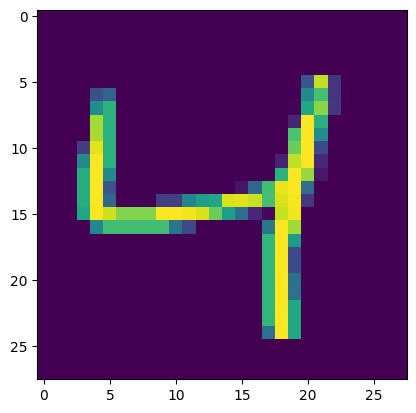

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [31]:
X_train = X_train/255
X_test = X_test/255

In [32]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
X_train[0].shape


(28, 28)

In [34]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=[28,28,1]))
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))


In [35]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',kernel_regularizer=tensorflow.keras.regularizers.L2(0.05)))
model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform',kernel_regularizer=tensorflow.keras.regularizers.L2(0.05)))
model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 flatten_3 (Flatten)         (None, 288)              

In [37]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [38]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [39]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2,callbacks=callback)

Epoch 1/100
1500/1500 [==============================] - 22s 12ms/step - loss: 2.6805 - accuracy: 0.5385 - val_loss: 0.5475 - val_accuracy: 0.9503
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0734 - accuracy: 0.7402 - val_loss: 0.4051 - val_accuracy: 0.9643
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9936 - accuracy: 0.7631 - val_loss: 0.3289 - val_accuracy: 0.9777
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9511 - accuracy: 0.7694 - val_loss: 0.3103 - val_accuracy: 0.9798
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9195 - accuracy: 0.7804 - val_loss: 0.3296 - val_accuracy: 0.9782
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9296 - accuracy: 0.7768 - val_loss: 0.3089 - val_accuracy: 0.9812
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9028 - accuracy: 0.7805 - val_loss: 0.2919 - val_

In [40]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [41]:
y_pred = y_prob.argmax(axis=1)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.983

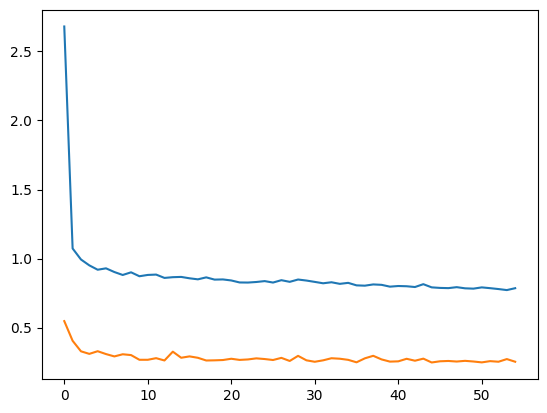

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

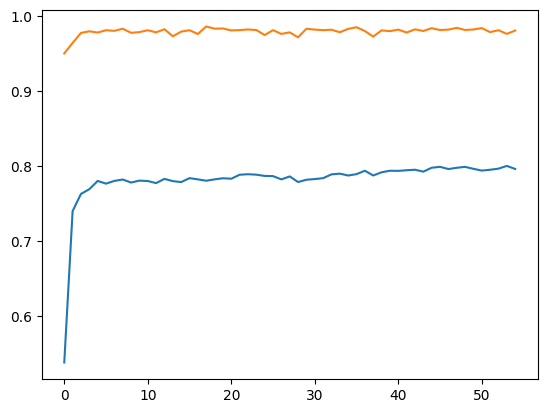

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

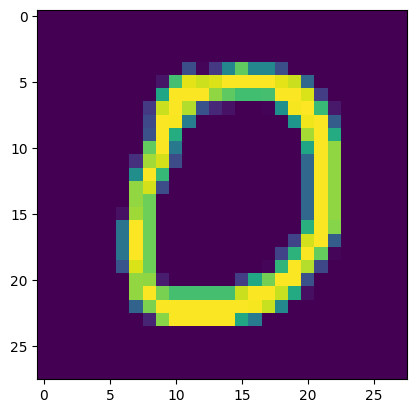

In [45]:
plt.imshow(X_test[10])

In [46]:
model.predict(X_test[10].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 112ms/step


array([0])